<a href="https://colab.research.google.com/github/moyocoyani/geopandasPseudo3D/blob/master/Crear_mapa_proyeccion_pseudo_3d_en_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crea un mapa en perspectiva 2.5D con python.
![](https://raw.githubusercontent.com/moyocoyani/geopandasPseudo3D/master/figures/intro.png)

__Autor:__ Moyocoyani Molina-Espíritu

__Fecha de última edición:__ 03/05/2020


En este notebook encontrarás pasos para crear un mapa de México en perspectiva 2.5D, así como posibles eventualidades que podrían surgir al momento de crearlo.

El notebook está dividido en cuatro partes.

- __Set up.__ Que se necesita tener instalado y que debes importar para seguir los pasos del notebook.
- __Transformaciones afínes.__ Una breve introducción al tipo de transformaciones que puedes aplicar a un dataset de geopandas.
- __Creando la perspectiva 2.5D.__ Los pasos a seguir para poder graficar un mapa en una perspectiva 2.5D; así como un par de consejos para resolver algunas cuestiones que podrían presentarse.
- __Notas finales.__ Algunos comentarios extras que podrían ser de ayuda.

Se espera que el lector tenga conocimientos intermedios sobre matplotlib y pandas. No es necesario que conozca sobre geopandas aunque sería de gran ayuda.

Espero este contenido te ayude, te inspire o te permita crear algo que sea de utilidad para analizar o visualizar tus datos.

# 1. Set up. 
Para este notebook necesitaremos instalar geopandas (en caso de que no esté instalado)

In [0]:
!pip install geopandas 2>&1>temp_file

En la primer sección trabajaremos con los paquetes de matplotlib y geopandas.

In [0]:
import geopandas
import matplotlib.pyplot as plt

Y antes de comenzar vamos a establecer un mismo formato para las gráficas que hagamos.

In [0]:
#Formato para matplotlib
import matplotlib as mpl

mpl.rc('axes.spines', top=False, right=False)
mpl.rc('font', size=14)
mpl.rcParams['xtick.color']='#bfbfbf'
mpl.rcParams['ytick.color']='#bfbfbf'
mpl.rcParams['axes.edgecolor'] = '#bfbfbf'
mpl.rcParams['font.sans-serif']='Microsoft Sans Serif'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.titlesize'] = 20

# Transformaciones afínes en geopandas.

Los mapas geográficos pueden abstraerce como datos almacenados que codifican a un conjunto de polígonos cuyas coordenadas indican una posición en el globo terráqueo.
 
 En [geopandas podemos acceder a ese tipo de representación a través de archivos que contengan vectores con información espacial](https://geopandas.org/io.html) (GeoJSON o "ESRI shapefile")
 
 Como ejemplo vamos a exportar un mapa mundial

In [0]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Podemos encontrar que cada país (name) contiene un polígono asociado en la columna _geometry_. Ese tipo de dato es el que contiene la información espacial de algún sitio específico.

In [0]:
world.head(5)["geometry"]

0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: geometry, dtype: geometry

Cómo estas representaciones son polígonos dispuestos en un plano coordenado, es posible aplicar sobre ellas una transformación afín.

Una [__transformación afín__](https://www.mathworks.com/discovery/affine-transformation.html) es una operación que permite modificar un objeto pero preservando puntos, líneas rectas y planos. 

![gráfico tipo lollipop](https://solarianprogrammer.com/images/2013/05/22/simple_transformations.jpg).


Por ejemplo, rotar una imagen, tantos grados te plazca, es un ejemplo de transformación afín ya que preserva la estructura fundamental del objeto pero se encuentra en una orientación espacial diferente a la original. 

Para manipular las coordenadas espaciales, Geopandas se basa en [shapely](https://shapely.readthedocs.io/en/latest/) para realizar operaciones geométricas, __únicamente necesitamos especificar la columna que contiene los datos geométricos (polígonos) y podemos operar sobre ese conjunto de datos al indicar el nombre de la transformación que necesitamos.__

A continuación mencionamos algunas transformaciones afines que podemos realizar con geopandas.

## Ejemplos de transformaciones afínes.

__Traslación:__ mover el polígono de una posición a otra (arriba, abajo, a los lados, en diagonal) sin alterar su tamaño.

La forma general de esta operación, $T_t$, se puede representar como:

\begin{equation}
 T_t = \begin{bmatrix}
       1 & 0 & 0 & x_{off} \\
       0 & 1 & 0 & y_{off} \\
       0 & 0 & 1 & z_{off} \\
       0 & 0 & 0 & 1
       \end{bmatrix}
\end{equation}

Para ejemplificar esta operación vamos a trasladar a México, y lo vamos a colocar enfrente de Estados Unidos. Vamos a trasladar a México 40 unidades a la izquierda ($x_{off}$), 20 unidades hacia arriba ($y_{off}$), y obviamente  0 unidades sobre el eje z ($z_{off}$).

Como mencionamos previamente, geopandas utiliza _shapely_ para poder realizar varias operaciones geométricas, por lo que sólo necesitamos el _dataset_ de geopandas, la columna _geometry_, el nombre de la transformación afín que es _translate_ en este caso, y los valores de $x_{off}$, $y_{off}$ y $z_{off}$

`dataset['geometry'].translate(xoff=-40.0, yoff=20.0, zoff=0.0)`

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


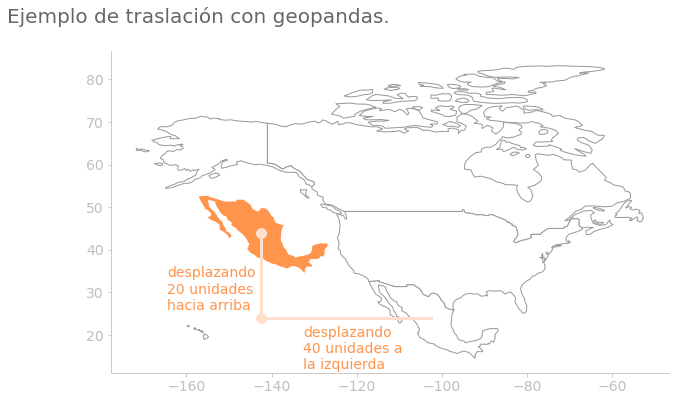

In [0]:
#Asignando una lista para filtrar únicamente tres países
countries = ['Canada', 'United States of America', 'Mexico']
#Obteniendo el centroide de México
x0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.x)
      .values)

y0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.y)
      .values)

#Graficando a través de geopandas y matploltib
fig,ax = plt.subplots(1,1,figsize=(10,8))
#Mapa con USA, Canadá y México
(world[world['name']
       .isin(countries)]
 .plot(ax=ax,edgecolor="#999999",color="white"))

#Mapa de México trasladado
#*************************************************
# Aqui esta la intrucción para trasladar únicamente
# a los polígonos que coincidan con el nombre de México
# en la columna "name"
#*****************************************************
(world[world['name']=="Mexico"]
 .geometry
 .translate(xoff=-40.0, yoff=20.0, zoff=0.0)
 .plot(ax=ax,color="#ff944d",zorder=2))

#*************************************************

#líneas de referencia
ax.plot([x0,x0-40],[y0,y0],color="#ffe0cc",zorder=1,linewidth=3)
ax.plot([x0-40,x0-40],[y0,y0+20],color="#ffe0cc",zorder=2,linewidth=3)
ax.scatter([x0-40],[y0],color="#ffe0cc",zorder=2,s=100)
ax.scatter([x0-40],[y0+20],color="#ffe0cc",zorder=2,s=100)

#Texto de referencia
ax.text(x=(x0-30),y=(y0-12),
        s="desplazando\n40 unidades a\nla izquierda",
        color="#ff944d")

ax.text(x=(x0-62),y=(y0+2),
        s="desplazando\n20 unidades \nhacia arriba",
        color="#ff944d")

plt.title("Ejemplo de traslación con geopandas.\n",horizontalalignment="right",
          color="#666666")
plt.show()

__Rotación:__ colocar un punto sobre el plano (centro de rotación) y girar todos los puntos restantes en torno a ese centro de rotación.

El operador de rotación ($T_r$) para un plano $2D$ , con un ángulo $\theta$, se define como:

\begin{equation}
 T_r = \begin{bmatrix}
       cos\theta & -sin\theta & x_{off} \\
       sin \theta & cos\theta& y_{off} \\
       0 & 0 & 1
       \end{bmatrix}
\end{equation}

Acorde con la [documentación de shapely](https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations) los _offsets_ para $x$ y para $y$ se expresan de la siguiente manera:

\begin{equation}
x_{off} = x_0 -x_0cos\theta + y_0 sin\theta \\
y_{off} = y_0 -x_0sin\theta - y_0 cos\theta
\end{equation}

Como ven, se necesita especificar un par coordenado ($x_0,y_0$) para crear el _offset_ correspondiente.

En este caso, si queremos rotar a México 90°, sin trasladarlo, debemos poner un comando similar a:

`dataset['geometry'].rotate(angle=90,origin=(x0,y0),use_radians=False)`

el argumento "use_radians" sirve para indicarle a la función si estamos expresando los ángulos en grados o en radianes (grados en este caso)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


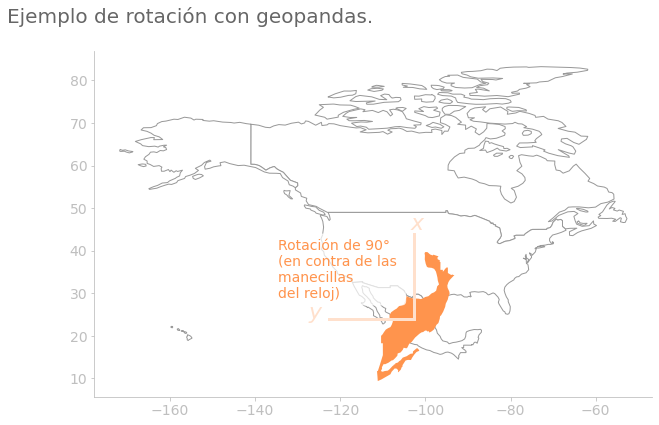

In [0]:
#Asignando una lista para filtrar únicamente tres países
countries = ['Canada', 'United States of America', 'Mexico']
#Obteniendo el centroide de México
x0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.x)
      .values)

y0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.y)
      .values)

#Graficando a través de geopandas y matploltib
fig,ax = plt.subplots(1,1,figsize=(10,8))
#Mapa con USA, Canadá y México
(world[world['name']
       .isin(countries)]
 .plot(ax=ax,edgecolor="#999999",color="white"))

#Mapa de México trasladado
#*************************************************
# Aqui esta la intrucción para rotar únicamente
# a los polígonos que coincidan con el nombre de México
# en la columna "name"
#*****************************************************
(world[world['name']=="Mexico"]
 .geometry
 .rotate(angle=90,origin=(x0,y0),use_radians=False)
 .plot(ax=ax,color="#ff944d",zorder=2))

#*************************************************

#líneas de referencia
ax.plot([x0,x0-20],[y0,y0],color="#ffe0cc",zorder=2,linewidth=3)
ax.plot([x0,x0],[y0,y0+20],color="#ffe0cc",zorder=2,linewidth=3)
ax.text(x=x0-1,y=y0+21,s=f'$x$',color="#ffe0cc",fontsize=22)
ax.text(x=x0-25,y=y0,s=f'$y$',color="#ffe0cc",fontsize=22)

#Texto de referencia

ax.text(x=(x0-32),y=(y0+5),
        s="Rotación de 90°\n(en contra de las \nmanecillas \ndel reloj)",
        color="#ff944d",bbox=dict(boxstyle='round', facecolor='white', alpha=0.7,
                                  edgecolor="white"))

plt.title("Ejemplo de rotación con geopandas.\n",horizontalalignment="right",
          color="#666666")
plt.show()

__Escalamiento:__ hacer más grande o más pequeño el polígono sin alterar su forma original. Se define de la siguiente manera:

\begin{equation}
 T_s = \begin{bmatrix}
       x_{fact} & 0 & 0    & x_{off} \\
       0        & y_{fact} & 0 & y_{off} \\
       0        & 0        & z_{fact} & z_{off} \\
       0        & 0        &  0        & 1
       \end{bmatrix}
\end{equation}

Para ejecutar el código de este operador necesitamos indicar la columna que contiene la información de los polígonos (_geometry_), los valores para $x_{fact}$, $y_{fact}$ y $z_{fact}$, y un origen ($x_0$, $y_0$, $z_0$). En nuestro caso, para aumentar 6 veces el tamaño de México, de manera uniforme, podríamos introducir una instrucción semejante a:

`dataset['geometry'].scale(xfact=6,yfact=6,zfact=1,origin=(x0,y0))`

A partir de los valores de $x_{fact}$, $y_{fact}$, $z_{fact}$, $x_0$, $y_0$, $z_0$, [se pueden obtener los _offsets_](https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations)

\begin{equation}
x_{off} = x_0 -x_0x_{fact} \\
y_{off} = y_0 -y_0y_{fact} \\
z_{off} = z_0 -z_0z_{fact} \\
\end{equation}

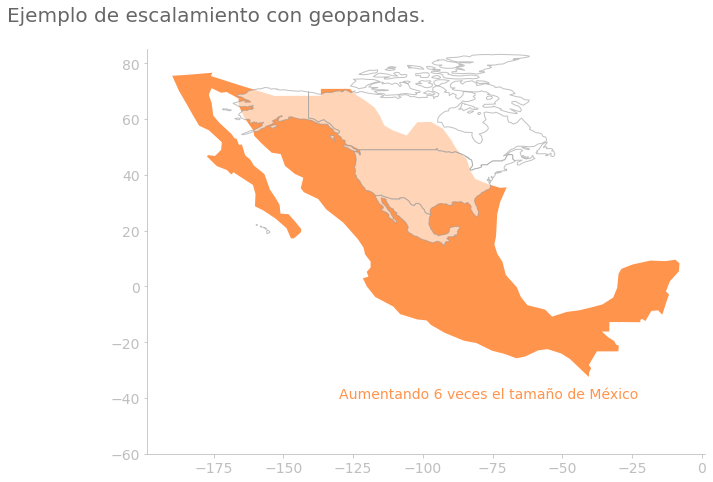

In [0]:
#Asignando una lista para filtrar únicamente tres países
countries = ['Canada', 'United States of America', 'Mexico']
#Obteniendo el centroide de México
x0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.x)
      .values)

y0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.y)
      .values)

#Graficando a través de geopandas y matploltib
fig,ax = plt.subplots(1,1,figsize=(10,8))

#Mapa de México escalado
#*************************************************
# Aqui esta la intrucción para escalar únicamente
# a los polígonos que coincidan con el nombre de México
# en la columna "name"
#*****************************************************
(world[world['name']=="Mexico"]
 .geometry
 .scale(xfact=6,yfact=6,zfact=1,origin=(x0,y0))
 .plot(ax=ax,color="#ff944d",zorder=1))

#*************************************************

#Mapa con USA, Canadá y México
(world[world['name']
       .isin(countries)]
 .plot(ax=ax,edgecolor="#999999",color="white",zorder=2,alpha=0.6))

#Texto de referencia
ax.text(x=-130,y=-40,
        s="Aumentando 6 veces el tamaño de México",
        color="#ff944d",bbox=dict(boxstyle='round', facecolor='white', alpha=0.7,
                                  edgecolor="white"))

ax.set_ylim(-60,85)

plt.title("Ejemplo de escalamiento con geopandas.\n",horizontalalignment="right",
          color="#666666")
plt.show()

__Sesgar:__ desplazamiento de todos los puntos del polígono a lo largo de una sola dirección.

El operador para sesgar (o _skew_) se define como:

\begin{equation}
 T_s = \begin{bmatrix}
       1 & tanx_s &  x_{off} \\
       tany_s     & 1 & y_{off} \\
       0          & 0 & 1
       \end{bmatrix}
\end{equation}

dónde [los _offsets_ se calculan a partir del origen](https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations)

\begin{equation}
x_{off} = -y_0tan~x_s \\
y_{off} = -x_0tan~y_s
\end{equation}

Para nuestro ejemplo, si quiesieramos "sesgar" 120 grados podríamos introducir una línea de código semejante a:

`dataset['geometry'].skew(xs=120,ys=0.0,use_radians=False,origin=(x0,y0))`

Observa que, al igual que para _rotate_, estamos indicando que los ángulos se expresan en grados (`use_radians=False`)

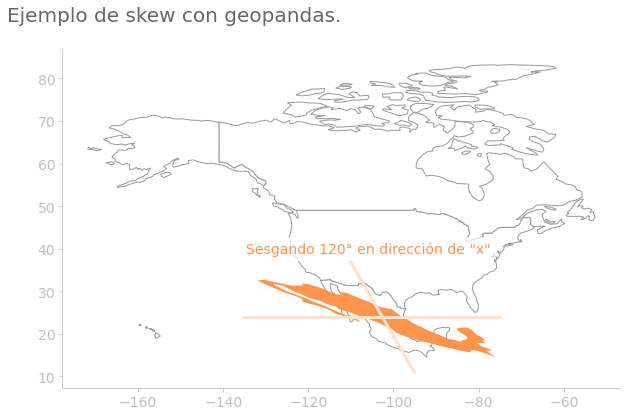

In [0]:
#Asignando una lista para filtrar únicamente tres países
countries = ['Canada', 'United States of America', 'Mexico']
#Obteniendo el centroide de México
x0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.x)
      .values)

y0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.y)
      .values)

#Graficando a través de geopandas y matploltib
fig,ax = plt.subplots(1,1,figsize=(10,8))
#Mapa con USA, Canadá y México
(world[world['name']
       .isin(countries)]
 .plot(ax=ax,edgecolor="#999999",color="white"))

#Mapa de México trasladado
#*************************************************
# Aqui esta la intrucción para sesgar únicamente
# a los polígonos que coincidan con el nombre de México
# en la columna "name"
#*****************************************************
(world[world['name']=="Mexico"]
 .geometry
 .skew(xs=120,ys=0.0,use_radians=False,origin=(x0,y0))
 .plot(ax=ax,color="#ff944d",zorder=2))

#*************************************************

#líneas de referencia
ax.plot([-75,-135],[y0,y0],color="#ffe0cc",zorder=2,linewidth=3)
ax.plot([x0+7.5,x0-7.494],[y0-12.990,y0+12.993],color="#ffe0cc",zorder=2,linewidth=3)

#Texto de referencia

ax.text(x=(x0-32),y=(y0+15),
        s="Sesgando 120° en dirección de \"x\"",
        color="#ff944d",bbox=dict(boxstyle='round', facecolor='white', alpha=0.7,
                                  edgecolor="white"))

plt.title("Ejemplo de skew con geopandas.\n",horizontalalignment="right",
          color="#666666")
plt.show()

# Implementando un mapa de México en 2.5D.

Vamos a utilizar las transformaciones afines para generar un plano en una proyección $2.5 D$.

Algo que tienen en común las proyecciones en $2.5D$ es que los ángulo exteriores, del punto con la menor magnitud en $y$, tienden a $\sim27°$ (en realidad es $26.565°$, pero para términos didácticos estaremos manejando $27°$); por lo tanto, si aplicamos una serie de transformaciones afines sobre un mapa de geopandas, podemos obtener una proyección $2.5D$, o pseudo $3D$.

Como ya vimos, geopandas opera de manera semejante a pandas, por lo que podemos aplicar _pipelines_ y conectar más de una transformación afín en un solo comando. 

En nuestro caso particular tendríamos que introducir un código semejante a:

`dataset["geometry"].skew(xs=-36,ys=0,use_radians=False,origin=(x0,y0)).rotate(angle=27,use_radians=False,origin=(x0,y0)))`.

donde `dataset` es el mapa que cargaremos a través de geopandas.

Un mapa de México que encontré es el que [Jon Schleuss tiene en su repositorio de github](https://github.com/jschleuss/mexican-states), el cual se hizo a través de una [herramienta de Los Angeles Times](https://github.com/datadesk/web-map-maker/) utilizando datos de [OpenStreetMap](https://www.openstreetmap.org). La licencia es libre por lo que podemos clonar el repositorio y cargar el mapa con ayuda de geopandas.

In [0]:
!git clone https://github.com/jschleuss/mexican-states.git 

Cloning into 'mexican-states'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


Ahora sólo necesitamos el _shapefile_

In [0]:
mex=geopandas.read_file("mexican-states/mexican-states.shp")
mex.head(12)

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


Esta es la visualización del mapa en la proyección en que viene codificado dentro de nuestro dataset de geopandas. Toma en cuenta que la proyección por default casi siempre es _Mercator_ y no es la mejor proyección para trabajar con mapas. Para más información sobre mapas en visualización de datos recomiendo leer el capítulo 10 de "The truthful art" de Alberto Cairo `Cairo, A. (2016). The truthful art: data, charts, and maps for communication. New Riders.`, y el artículo [So You Want To Make A Map?](https://medium.com/nightingale/so-you-want-to-make-a-map-58c7f55f6b20) de Kenneth Field.

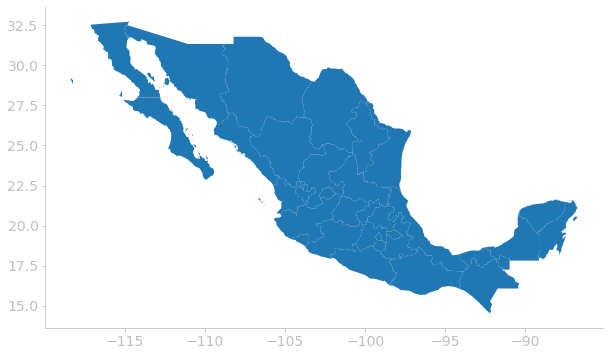

In [0]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
mex.plot(ax=ax)
plt.show()

y asi quedaría el mapa en una proyección $2.5D$ al utilizar el comando sugerido en párrafos previos.

En este caso utilizam0s el centroide previamente calculado para México en el mapa mundial:

`x0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.x)
      .values)`

y

`y0 = (world[world["name"]=="Mexico"]
      .centroid
      .apply(lambda p:p.y)
      .values)`

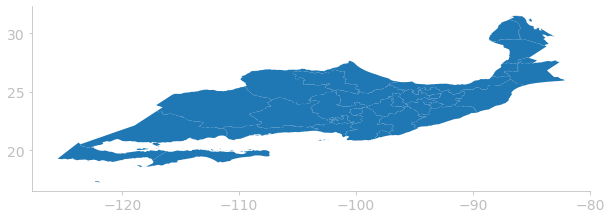

In [0]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
(mex["geometry"]
 .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
 .rotate(angle=33,use_radians=False,origin=(x0,y0))
.plot(ax=ax))
plt.show()

La ventaja de usar una proyección _pseudo 3D_ en un mapa es que nos permite utilizar adecuadamente la altura como canal para comparar un conjunto de datos geográficos. 

Para enfatizar este punto, vamos a utilizar algunos indicadores por estado, creados aleatoriamente, para plasmarlos en nuestro mapa a través de símbolos tipo _lollipop._

![gráfico tipo lollipop](https://datavizproject.com/wp-content/uploads/2017/09/DVP_101_200-64.png).


Vamos a suponer que tenemos el siguiente dataset:

In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Entidad federativa': mex.name.tolist(),
                   'Indicador ficticio':np.random.uniform(300,1000,[32])})

df

,Entidad federativa,Indicador ficticio
0,Aguascalientes,717.300817
1,Colima,989.314072
2,Tlaxcala,695.094622
3,Ciudad de México,947.301408
4,Morelos,359.318005
5,México,947.226872
6,Hidalgo,314.120559
7,Puebla,735.883213
8,Nuevo León,793.691385
9,Coahuila de Zaragoza,786.120947


Ya tenemos los datos geográficos y los datos que queremos graficar; el siguiente paso es extraer las coordenadas de los estados de la república.

Esas coordenadas nos servirán para colocar nuestras gráficas de _lollipop_ en el estado correspondiente.

Para extraer las coordenadas vamos a crear un par de funciones:

In [0]:
def get_x(geo_df):
  """
  get_x obtains the centroids x-coordinate from the transformed map
  i.e. the x-coordinates for every state 
  """
  return (geo_df
          .centroid
          .apply(lambda p:p.x)
          .values)
  
def get_y(geo_df):
  """
    get_y obtains the centroids y-coordinate from the transformed map
  i.e. the y-coordinates for every state
  """
  return (geo_df
          .centroid
          .apply(lambda p:p.y)
          .values)

Y nuestro dataset de geopandas tendría que ser nuestro mapa de México transformado en una proyección $2.5D$

In [0]:
mex2_5 = (mex.sort_values(by="name")["geometry"]
          .reset_index(drop=True)
          .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
          .rotate(angle=33,use_radians=False,origin=(x0,y0)))

En este caso, si son observadores, trabajaremos con una serie de geopandas y no con el dataset completo. Esta serie corresponde a la columna de "geometry" y está ordenado alfabeticamante acorde a la columna "name" (que es el nombre de los estados).

En este momento tenemos la información espacial (coordenadas geográficas) y los datos para mostrar por estado (indicador ficticio). Es hora de plasmar esos datos.


In [0]:
df.sort_values(by="Entidad federativa").reset_index(drop=True,inplace=True)

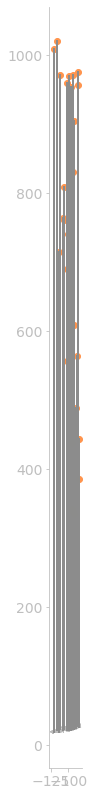

In [0]:
fig,ax = plt.subplots(1,1,figsize=(14,14))

x=get_x(mex2_5)
y=get_y(mex2_5)
mex2_5.plot(ax=ax,color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)

ax.scatter(x=x,
           y=y+df["Indicador ficticio"],
           color="#ff944d")
for i in range(31):
  ax.plot([x,x],
          [y,y+df["Indicador ficticio"]],
          color="#8c8c8c",
          zorder=1)
plt.show()

Oooops ¡Los datos de nuestro indicador ficticio quedan muy por encima de los valores del mapa! Bueno, eso se debe a que nuestros datos están acotados en valores de 300 a 1000, y las coordenadas del mapa (latitud y longitud) entre 20 y 30, por lo que sumar los valores de los porcentajes con las coordenadas produce esa gran disparidad.

count     32.000000
mean     692.409603
std      221.726943
min      310.866338
25%      532.817976
50%      709.423675
75%      930.481168
max      998.630056
Name: Indicador ficticio, dtype: float64


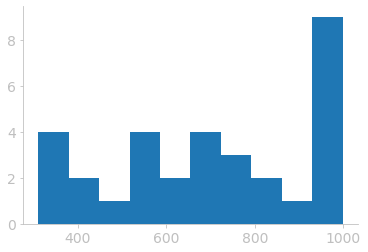

In [0]:
print(df['Indicador ficticio'].describe())
display(df['Indicador ficticio'].hist(grid=False))



Una forma de remediar esta situación es aplicando una transformación lineal. En este caso queremos que los valores se encuentren acotados entre $1$ y $10$.

Para ello necesitamos implementar la siguiente transfomarción:

\begin{equation}
   x' = B \frac{x_i - x_{min}}{x_{max}-x_{min}} + A
\end{equation}

donde $B>A$ son nuestros valores límite. En nuestro caso la ecuación se quedaría de esta manera:

\begin{equation}
   x' = 10 \frac{x_i - x_{min}}{x_{max}-x_{min}} + 1
\end{equation}

Vaos a implementar esta expresión en su forma general:


In [0]:
def scale_linear(A,B,cases):
  """
  scale_linear scales the number of cases to a fixed interval
  in this case the interval goes from 1 to 10.

  cases is dataset (pandas series) that contains the number of cases
  per entity.

  It return the scaled quantities, for every data point, as a 
  pandas series 
  """
  return ((A*(cases-cases.min()))/(cases.max()-cases.min())+B)

Y con esta función de escalamiento podemos plasmar, sin problema, nuestros datos en el mapa del territorio mexicano.

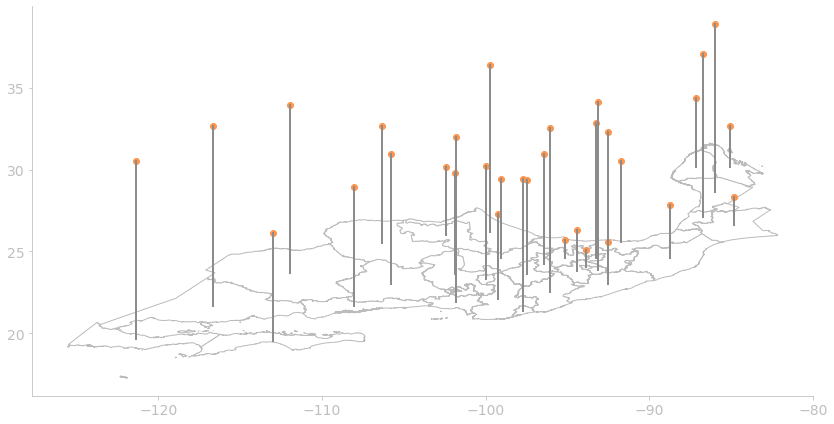

In [0]:
fig,ax = plt.subplots(1,1,figsize=(14,14))

x=get_x(mex2_5)
y=get_y(mex2_5)
y2 = scale_linear(10,1,df["Indicador ficticio"])
mex2_5.plot(ax=ax,color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)

ax.scatter(x=x,
           y=y+y2,
           color="#ff944d")
for i in range(31):
  ax.plot([x,x],
          [y,y+y2],
          color="#8c8c8c",
          zorder=1)
plt.show()

Aqui hay dos aspectos importantes a considerar.

El primero es que el territorio mexicano está plasmado en un plano, pero no podemos visualizarlo, entonces esta representación no nos brinda esa percepción de que todos los puntos parten de un mismo plano. Eso se puede arreglar creando un plano que establezca los límites del país.

Para eso vamos a utilizar la librería _shapely_ y las transformaciones _skew_, _rotate_ y _scale_ de la misma librería.

Con shapely extraemos los límites del mapa, creamos un polígono, y ejecutamos exactamente las mismas transformaciones que usamos con nuestro dataset.

Una función con los pasos que describimos previamente podría ser:

In [0]:
from shapely.affinity import skew,rotate,scale
from shapely.geometry import Polygon

def return_plane_coords(map_):
  """
  Return the x and y coordinates of a plane, that encloses a map,
  but transformed by applying a secuence of affine transformartions
  """
  def extract_polygon(map_):
    return Polygon([(map_.total_bounds[0],map_.total_bounds[1]-2),
                    (map_.total_bounds[2]+2,map_.total_bounds[1]-2),
                    (map_.total_bounds[2]+2,map_.total_bounds[3]+2),
                    (map_.total_bounds[0],map_.total_bounds[3]+2)])
  polygon = extract_polygon(map_)
  sk_tr=skew(polygon,xs=-40,ys=0,use_radians=False,origin=(x0,y0))
  rt_tr=rotate(sk_tr,angle=33,use_radians=False,origin=(x0,y0))
  return (rt_tr
          .exterior
          .coords
          .xy)

De esta manera ya tenemos una referencia visual de cual es origen de los puntos, y la comparación entre alturas se vuelve más natural.

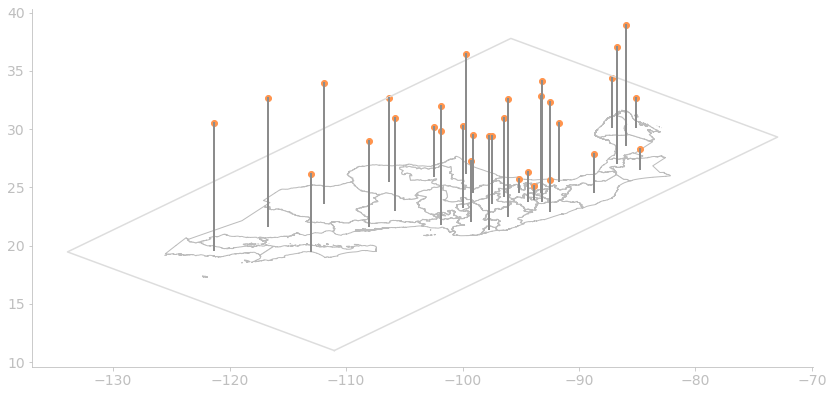

In [0]:
fig,ax = plt.subplots(1,1,figsize=(14,14))

x=get_x(mex2_5)
y=get_y(mex2_5)
y2 = scale_linear(10,1,df["Indicador ficticio"])
mex2_5.plot(ax=ax,color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)

ax.scatter(x=x,
           y=y+y2,
           color="#ff944d")

ax.plot(return_plane_coords(mex2_5)[0],
           np.asarray(return_plane_coords(mex)[1]),
           color="#dddddd",zorder=1)

for i in range(31):
  ax.plot([x,x],
          [y,y+y2],
          color="#8c8c8c",
          zorder=1)
plt.show()

El siguiente punto que debemos considerar es la distribución espacial de los estados. 

Los estados del centro de la república son más pequeños que los del noroeste. Una manera en que podemos intentar arreglar ese detalle es cambiando nuestro ángulo en que percibimos el mapa, es decir, colocar el Golfo de México al frente para que sea lo primero que podamos observar.

Esta operación es relativamente sencilla, sólo hay que agregar una transformación extra a nuestro mapa `mex2_5`.

Pero antes hay que modificar el angulo de la operación _skew_, esto para preservar la igualdad de los ángulos externos generados por el plano que contiene a nuestro mapa. Recuerda que el punto de fuga que tenemos en la parte inferior de nuestra gráfica debe tener ángulos externos de $\sim 27°$.

In [0]:
mex2_5= (mex.sort_values(by="name")["geometry"]
          .reset_index(drop=True)
          .skew(xs=-35,ys=0,use_radians=False,origin=(x0,y0))
          .rotate(angle=33,use_radians=False,origin=(x0,y0))
          .rotate(angle=180,use_radians=False,origin=(x0,y0)))

la función que crea nuestro plano debe ser actualizada también

In [0]:
def return_plane_coords(map_):
  """
  Return the x and y coordinates of a plane, that encloses a map,
  but transformed by applying a secuence of affine transformartions
  """
  def extract_polygon(map_):
    return Polygon([(map_.total_bounds[0],map_.total_bounds[1]-2),
                    (map_.total_bounds[2]+2,map_.total_bounds[1]-2),
                    (map_.total_bounds[2]+2,map_.total_bounds[3]+2),
                    (map_.total_bounds[0],map_.total_bounds[3]+2)])
  polygon = extract_polygon(map_)
  sk_tr=skew(polygon,xs=-35,ys=0,use_radians=False,origin=(x0,y0))
  rt_tr=rotate(sk_tr,angle=33,use_radians=False,origin=(x0,y0))
  rt_tr=rotate(rt_tr,angle=180,use_radians=False,origin=(x0,y0))
  return (rt_tr
          .exterior
          .coords
          .xy)

dónde agregamos la línea de código:

`rt_tr=rotate(rt_tr,angle=180,use_radians=False,origin=(x0,y0))`


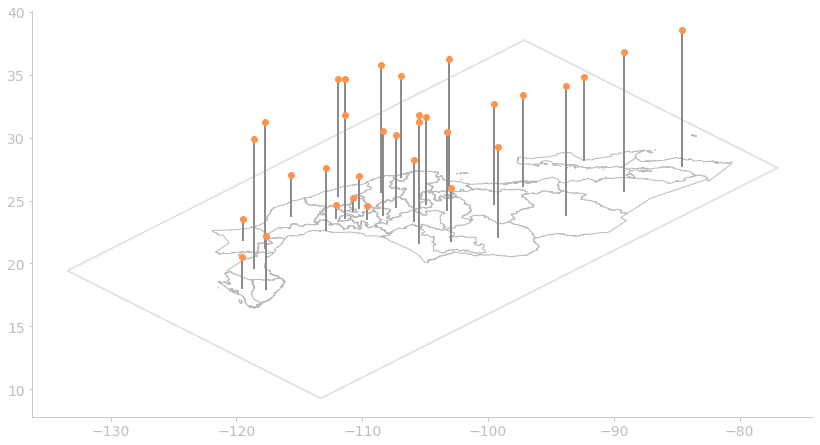

In [0]:
fig,ax = plt.subplots(1,1,figsize=(14,14))

x=get_x(mex2_5)
y=get_y(mex2_5)
y2 = scale_linear(10,1,df["Indicador ficticio"])
mex2_5.plot(ax=ax,color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)

ax.scatter(x=x,
           y=y+y2,
           color="#ff944d",
           zorder=2)

ax.plot(return_plane_coords(mex2_5)[0],
           np.asarray(return_plane_coords(mex)[1]),
           color="#dddddd",zorder=1)

for i in range(31):
  ax.plot([x,x],
          [y,y+y2],
          color="#8c8c8c",
          zorder=1)
plt.show()

¡Listo! Esa perspectiva nos permite tener una mejor visibilidad de los estados del centro.

# Notas finales.

A partir de este punto tu podrías jugar con el mapa y hacer tantos ajustes quieras.

Espero que al ver estos pasos, y como resolver ciertas eventualidades, se te venga a la mente como podrìas utilizar y mejorar este tipo de reresentaciòn.

Podrías probar:

- Utilizando otro tipo de símbolos.

<img src="https://raw.githubusercontent.com/moyocoyani/geopandasPseudo3D/master/figures/ejemplo_simbolo.png" width=900 >

- Cambiando la paleta de colores.

<img src="https://raw.githubusercontent.com/moyocoyani/geopandasPseudo3D/master/figures/intro.png" width=900 >


- Mostrando otro conjunto de datos.

<img src="https://raw.githubusercontent.com/moyocoyani/geopandasPseudo3D/master/figures/data.png" width=900 >


Otro aspecto que debes considerar y, más bien, debes preguntarte es ¿En verdad necesito graficar esos datos en un mapa? Recuerda, __no por tener datos geográficos es necesario e imperativo representarlos en un mapa.__ Si la ubicación espacial es relevante en tu análisis y tiene sentido mostrar esa posición geográfica, adelante; si no tiene mucho sentido es posible que otra visualización te ayude de una mejor manera.